In [1]:
import pandas as pd

# membaca file csv menggunakan pandas
df = pd.read_csv('/content/drive/MyDrive/Raktikum_ML/Praktikum06/Data/Iris.csv')

# cetak header data (5 baris data) dari file
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [6]:
X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]

y = df['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = model.predict(X_test)
# Akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
# Laporan Klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 100.00%

Laporan Klasifikasi:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30




Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


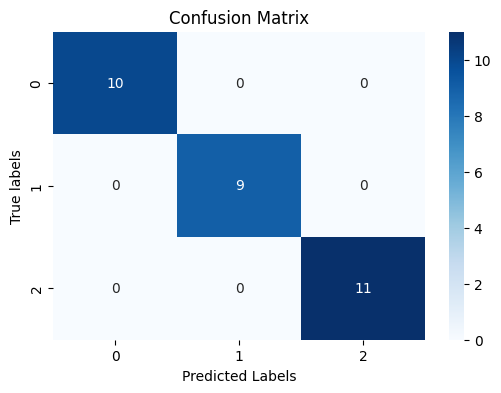

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Jika kamu tahu nama kelas (opsional, agar lebih informatif)
# misal: slass_names = ['Negatif', 'Positif']
# maka tambahkan ke heatmap di bagian "xticklabels" dan "yticklabels"

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True labels")
plt.show()


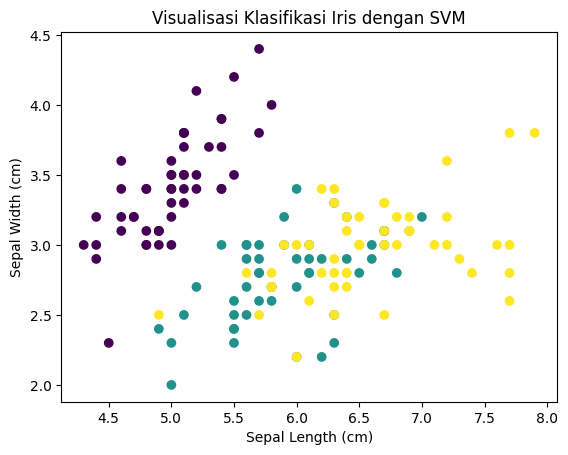

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Visualisasi Klasifikasi Iris dengan SVM')
plt.show()

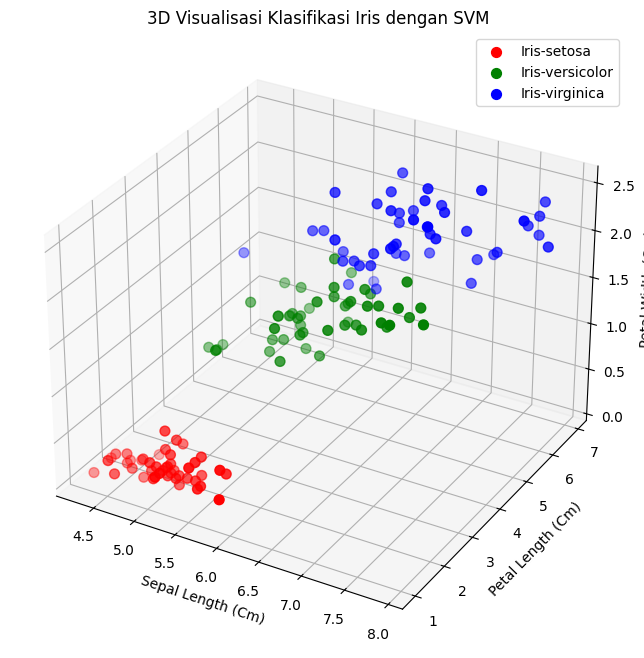

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3. encode label  (ubah teks jadi angka)
le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

# 8. plot 3D hasil klasifikasi
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# warna untuk tiap kelas
colors = ['r', 'g', 'b']
labels = le.classes_

# Plot tiap spesies dengan warna berbeda
for i, label in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        c=colors[i],
        label=label,
        s=50
    )

ax.set_xlabel('Sepal Length (Cm)')
ax.set_ylabel('Petal Length (Cm)')
ax.set_zlabel('Petal Width (Cm)')
ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')
ax.legend()
plt.show()

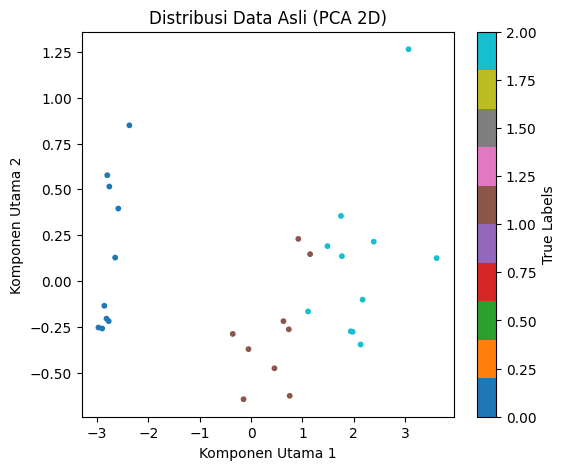

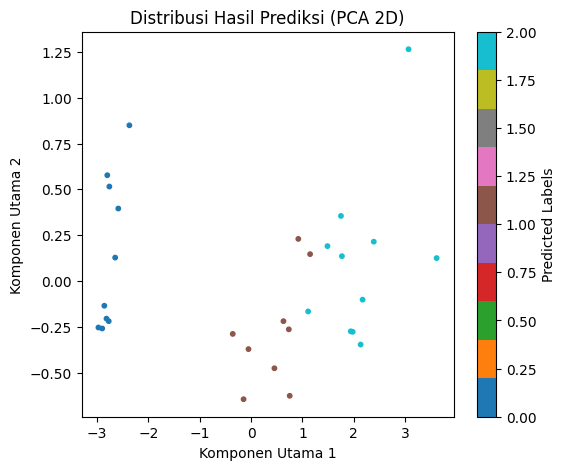

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Misal kamu sudah punya:
# X_train, X_test, y_train, y_test, y_pred

# --- 1. Reduksi dimensi jadi 2D untuk visualisasi ---
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Encode y_test and y_pred using the same LabelEncoder fitted on the original data
# Assuming the label encoder 'le' was fitted on the entire 'Species' column
le = LabelEncoder()
le.fit(df['Species']) # Fit on the entire 'Species' column from the original dataframe
y_test_encoded = le.transform(y_test)
y_pred_encoded = le.transform(y_pred)

# --- 2. Plot berdasarkan label asli ---
plt.figure(figsize=(6,5))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_test_encoded, cmap='tab10', s=10)
plt.title('Distribusi Data Asli (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='True Labels')
plt.show()

# --- 3. Plot berdasarkan label prediksi ---
plt.figure(figsize=(6,5))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_pred_encoded, cmap='tab10', s=10)
plt.title('Distribusi Hasil Prediksi (PCA 2D)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Predicted Labels')
plt.show()

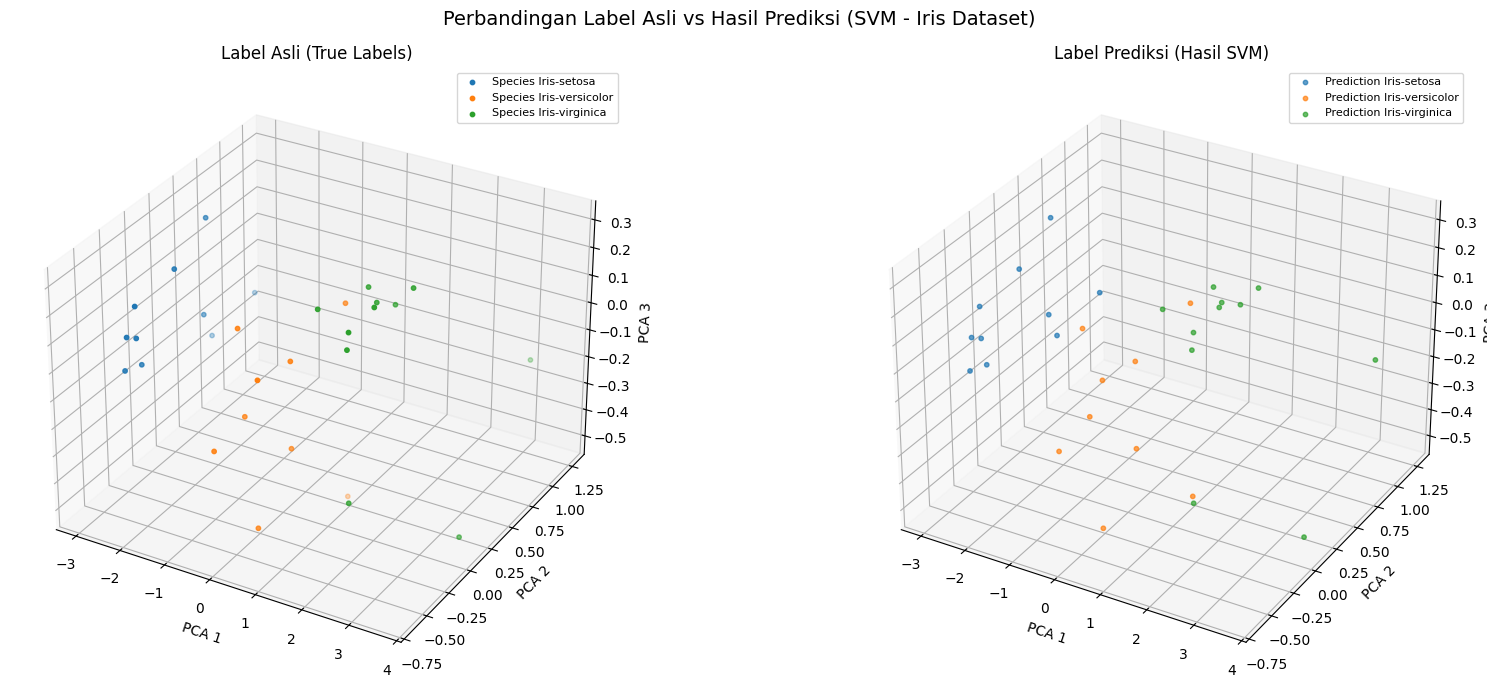

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Pastikan kamu sudah punya:
# X_test, y_test, y_pred

# --- 1. Reduksi dimensi ke 3 komponen PCA ---
pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(X_test)

# Encode y_test and y_pred using the same LabelEncoder fitted on the original data
le = LabelEncoder()
le.fit(df['Species']) # Fit on the entire 'Species' column from the original dataframe
y_test_encoded = le.transform(y_test)
y_pred_encoded = le.transform(y_pred)

# --- 2. Buat figure 3D ---
fig = plt.figure(figsize=(18, 7))
colors = plt.cm.tab10(np.linspace(0, 1, 10))  # warna untuk 10 digit

# ----------------------------
# Plot 1: Label Asli
# ----------------------------
ax1 = fig.add_subplot(121, projection='3d')
# Use the encoded labels for iteration and subsetting
for i in np.unique(y_test_encoded):
    subset = X_test_pca[y_test_encoded == i]
    # Use the integer index 'i' for the colors array
    ax1.scatter(subset[:, 0], subset[:, 1], subset[:, 2],
                color=colors[i], label=f"Species {le.classes_[i]}", s=10) # Use original class name for label
ax1.set_title("Label Asli (True Labels)", fontsize=12)
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")
ax1.set_zlabel("PCA 3")
ax1.legend(loc='upper right', fontsize=8)

# ----------------------------
# Plot 2: Label Prediksi
# ----------------------------
ax2 = fig.add_subplot(122, projection='3d')
# Use the encoded labels for iteration and subsetting
for i in np.unique(y_pred_encoded):
    subset = X_test_pca[y_pred_encoded == i]
    # Use the integer index 'i' for the colors array
    ax2.scatter(subset[:, 0], subset[:, 1], subset[:, 2],
                color=colors[i], label=f"Prediction {le.classes_[i]}", s=10, alpha=0.7) # Use original class name for label
ax2.set_title("Label Prediksi (Hasil SVM)", fontsize=12)
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_zlabel("PCA 3")
ax2.legend(loc='upper right', fontsize=8)

# ----------------------------
# Judul Utama
# ----------------------------
plt.suptitle("Perbandingan Label Asli vs Hasil Prediksi (SVM - Iris Dataset)", fontsize=14)
plt.tight_layout()
plt.show()